# Test FFT properties in torch
x: time domain

u: freq domain

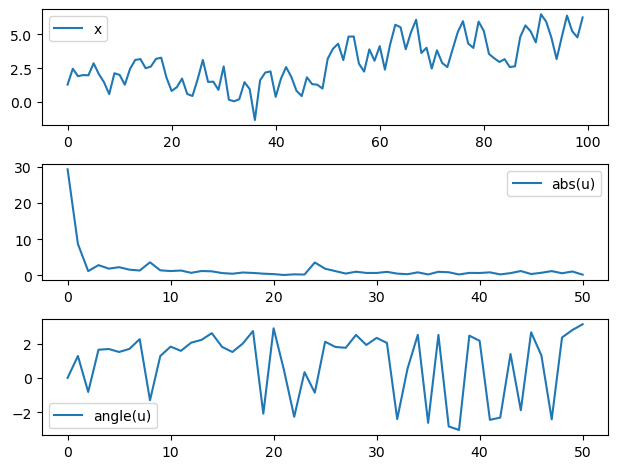

In [1]:
import torch
import matplotlib.pyplot as plt
seq_len = 100
t = torch.linspace(0, 4*torch.pi, seq_len)
x = torch.sin(t) + torch.sin(4*t)  + torch.sin(12*t) + torch.exp(t*0.15) + torch.randn_like(t)*0.5
u = torch.fft.rfft(x, norm='ortho')
fig, axs = plt.subplots(3)
axs[0].plot(x, label='x')
axs[0].legend()
axs[1].plot(u.abs(), label='abs(u)')
axs[1].legend()
axs[2].plot(u.angle(), label='angle(u)')
axs[2].legend()
fig.tight_layout()

## Linear property
$x^\prime = ax \Rightarrow u^\prime = au$

In [2]:
a = torch.randn(1)
b = torch.randn(1).expand_as(x)
# b = torch.randn(1)
x_prime = x*a
u_prime = torch.fft.rfft(x_prime, norm='ortho')
# print((u*a + torch.fft.rfft(b, norm='ortho'))[:10])
# print(u_prime[:10])
# print(torch.fft.rfft(b))
assert torch.allclose(u_prime, u*a, atol=1e-5, rtol=1e-5)

## Normalize in the frequency domain

Compute in time domain

In [3]:
x_mean, x_std = torch.mean(x), torch.sqrt(torch.var(x, unbiased=False) + 1e-6)
print('Mean:',x_mean)
print('STD:',x_std)
x_norm = (x - x_mean) / x_std

Mean: tensor(2.9299)
STD: tensor(1.7109)


compute in frequency domain

In [4]:
u_mean = torch.zeros_like(u)
u_mean[0] = u[0]
# u_re_im = torch.concat([u.real, u.imag[1:-1]])
# print(u_re_im)

u_var = torch.sum(torch.abs(u[1:]) ** 2) * 2 / (seq_len)
u_std = torch.sqrt(u_var)
print('Mean:',u_mean[0])
print('STD:',u_std)
u_norm = (u - u_mean) / u_std
x_norm_freq = torch.fft.irfft(u_norm, norm='ortho')

Mean: tensor(29.2995+0.j)
STD: tensor(1.7109)


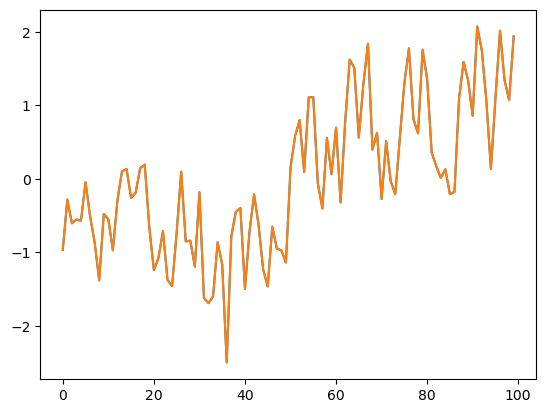

In [5]:
plt.plot(x_norm)
plt.plot(x_norm_freq)

## Unitary transform

In [6]:
y = torch.cos(t) + torch.sin(4*t)  + torch.cos(12*t) + torch.exp(t*0.15) + torch.randn_like(t)*0.5
v = torch.fft.rfft(y, norm='ortho')
mse_time = torch.norm(x - y, p=2) ** 2
mse_freq = torch.norm(u - v, p=2) ** 2 
print(mse_time)
print(mse_freq)

tensor(230.1953)
tensor(115.4420)
